<a href="https://colab.research.google.com/github/Axle-Bucamp/exploring/blob/main/vector_field_toying.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

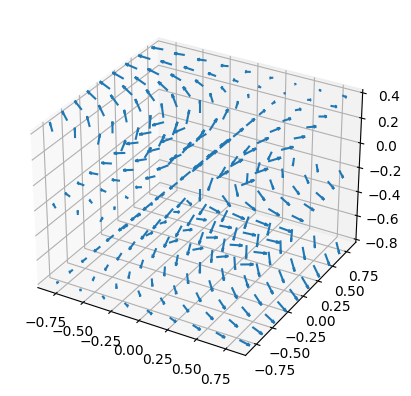

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

ax = plt.figure().add_subplot(projection='3d')

# Make the grid
x, y, z = np.meshgrid(np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.6))

# Make the direction data for the arrows
u = np.sin( x) * np.cos( y) * np.cos( z)
v = -np.cos(x) * np.sin( y) * np.cos( z)
w =  np.cos( x) * np.cos( y) * np.sin( z)

ax.quiver(x, y, z, u, v, w, length=0.1, normalize=True)

plt.show()

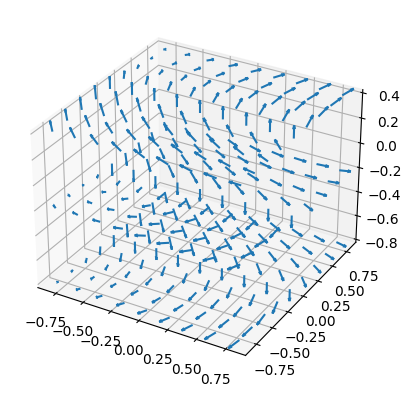

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

ax = plt.figure().add_subplot(projection='3d')

# Make the grid
x, y, z = np.meshgrid(np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.6))

# Make the direction data for the arrows
u = np.cos(x)*y
v = np.sin(y)*x
w = np.sin(z) * np.cos(z)

ax.quiver(x, y, z, u, v, w, length=0.1, normalize=True)

plt.show()

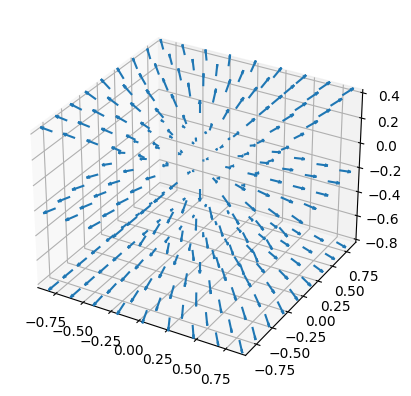

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

ax = plt.figure().add_subplot(projection='3d')

# Make the grid
x, y, z = np.meshgrid(np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.6))

# Make the direction data for the arrows
u = np.sin(x) * np.cos(x)
v = np.sin(y) * np.cos(y)
w = np.sin(z) * np.cos(z)

ax.quiver(x, y, z, u, v, w, length=0.1, normalize=True)

plt.show()

In [ ]:
import plotly.figure_factory as ff

import numpy as np

x,y = np.meshgrid(np.arange(0, 4, .2), np.arange(0, 4, .2))
u = np.cos(x)*y
v = np.sin(y)*x

fig = ff.create_quiver(x, y, u, v)
fig.show()

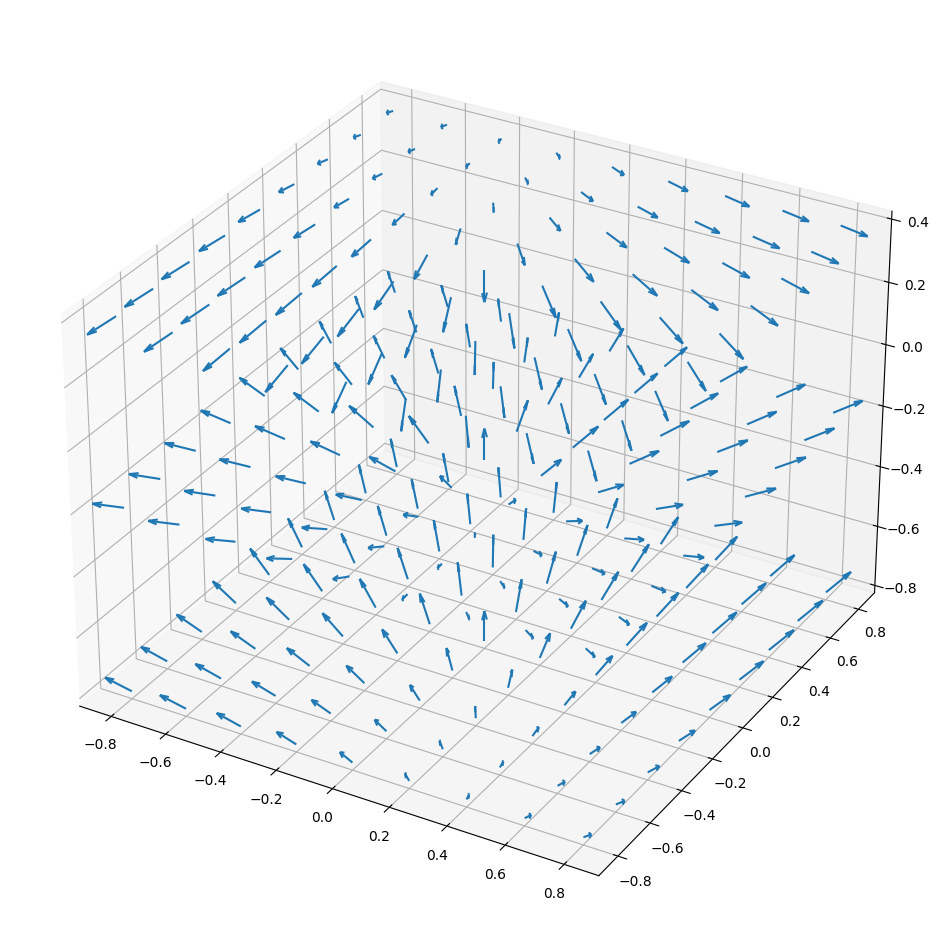

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

ax = plt.figure(figsize=(20,12)).add_subplot(projection='3d')

# Make the grid
x, y, z = np.meshgrid(np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.6))

# Make the direction data for the arrows
u = np.sin(x) * np.cos(x)
v = np.sin(y) * np.cos(y)
w = - np.sin(z) * np.cos(z)

ax.quiver(x, y, z, u, v, w, length=0.1, normalize=True)

plt.show()

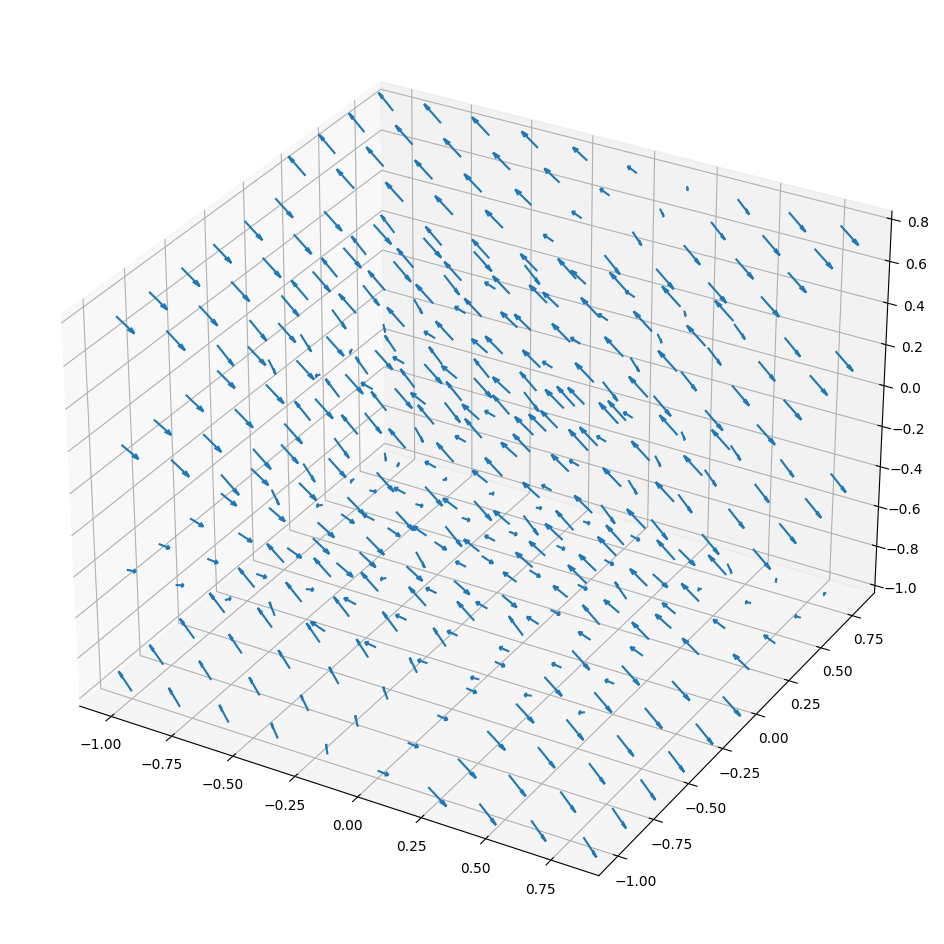

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import *

ax = plt.figure(figsize=(20,12)).add_subplot(projection='3d')

# Make the grid
x, y, z = np.meshgrid(np.arange(-1, 1, 0.2),
                      np.arange(-1, 1, 0.2),
                      np.arange(-1, 1, 0.6))

lx = Symbol('x')
ly = Symbol('y')
lz = Symbol('z')

f = cos(lx) * ly * sin(lx) * ly / ( lz + cos(lz) )

# d/dx
fpx = f.diff(lx)
lfpx = lambdify([lx, ly, lz], fpx, 'numpy')

# d/dy
fpy = f.diff(ly)
lfpy = lambdify([lx, ly, lz], fpy, 'numpy')

# d/dz
fpz = f.diff(lz)
lfpz = lambdify([lx, ly, lz], fpz, 'numpy')

# use the group theory to get every df/d(x,y,z)
df_dy = fpy * f
df_dx = fpx * f
df_dz = fpz * f

ldf_dy = lambdify([lx, ly, lz], df_dy, 'numpy')
ldf_dx = lambdify([lx, ly, lz], df_dx, 'numpy')
ldf_dz = lambdify([lx, ly, lz], df_dz, 'numpy')

axis_matrix = np.array([x, y, z])
gradient = np.array([lfpx(x, y, z), lfpy(x, y, z), lfpz(x, y, z)])
div = np.array([ldf_dx(x, y, z), ldf_dy(x, y, z), ldf_dz(x, y, z)])

# calculer à la main le curl et le div sous forme de fonction
lf = lambdify([lx, ly, lz], f, 'numpy')
curlx = lambdify([lx, ly, lz], fpy - fpz, 'numpy')
curly = lambdify([lx, ly, lz], fpz - fpx, 'numpy')
curlz = lambdify([lx, ly, lz], fpx - fpy, 'numpy')

# Make the direction data for the arrows
u = curlx(x, y, z)
v = curly(x, y, z)
w = curlz(x, y, z)

ax.quiver(x, y, z, u, v, w, length=0.1, normalize=True)

plt.show()

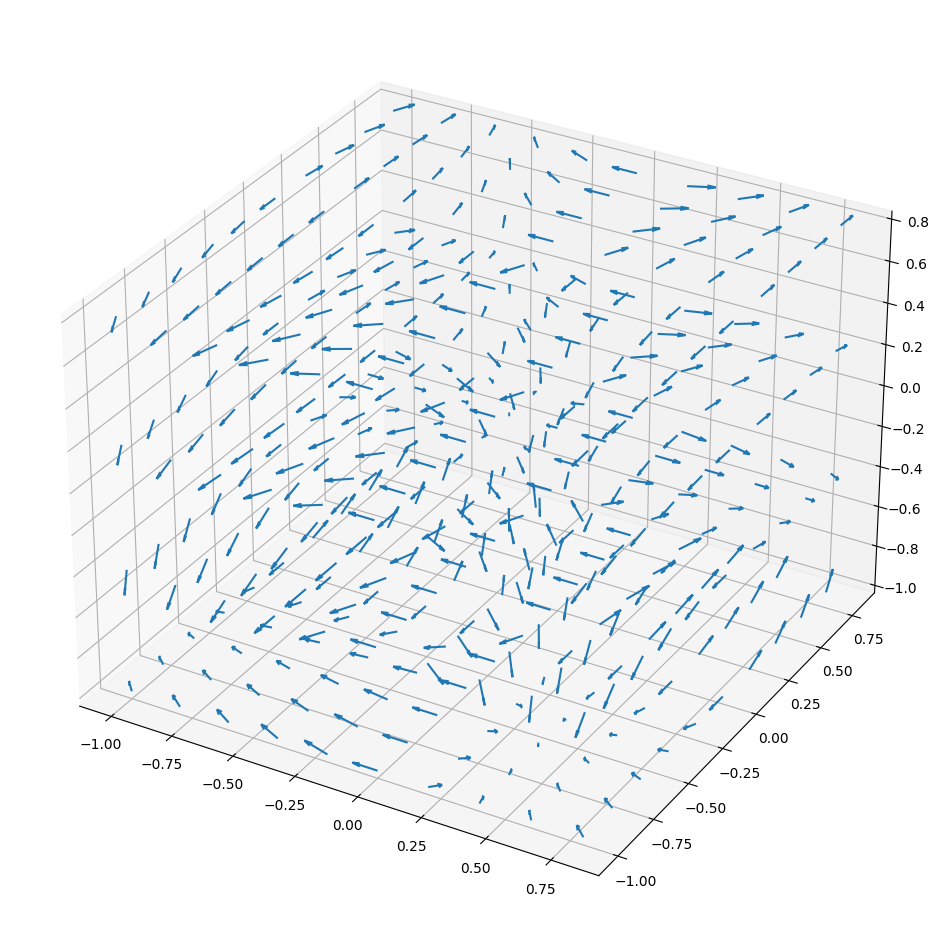

In [17]:
ax = plt.figure(figsize=(20,12)).add_subplot(projection='3d')

# Make the direction data for the arrows
u = div[0]
v = div[1]
w = div[2]

ax.quiver(x, y, z, u, v, w, length=0.1, normalize=True)

plt.show()

In [12]:
fpy

2*y*sin(x)*cos(x)/(z + cos(z))

In [13]:
fpz

y**2*(sin(z) - 1)*sin(x)*cos(x)/(z + cos(z))**2

In [ ]:
fpx

-y**2*sin(x)**2/(z + cos(z)) + y**2*cos(x)**2/(z + cos(z))

In [ ]:
fpy

2*y*sin(x)*cos(x)/(z + cos(z))

In [ ]:
fpz

y**2*(sin(z) - 1)*sin(x)*cos(x)/(z + cos(z))**2